In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [2]:
# raw1 = pd.read_csv('ApproachS70_FFP_ASSY.csv',usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item89','Item115','Item78','Item11','Item58','Item50'])

In [3]:
# raw1.to_excel('tweak_ApprochS70_FFP_ASSY.xlsx',index=False)

In [4]:
raw = pd.read_excel('tweak_ApprochS70_FFP_ASSY.xlsx')

In [5]:
# plt.style.use('fivethirtyeight')

def

In [6]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )

In [7]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [8]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = (df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','Vendor']])
    ,x='Vendor'
    ,y=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    ,dodge=True
    )
    )

In [9]:
# ALS 校驗完後電壓值不正常(修改測試程式)，且這次沒有Golden sample calibration，還有治具設計問題(有環境光進入)

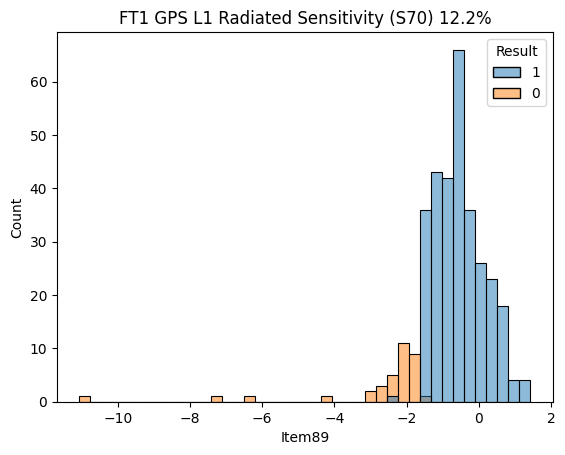

In [12]:
plt.title('FT1 GPS L1 Radiated Sensitivity (S70) 12.2%')
sns.histplot(data=tweak_df(raw,16521,89,-20), x='Item89',hue='Result', hue_order=[1,0], alpha=0.5);

In [13]:
# 會放到±2.5 db

In [14]:
mn.suggest_specification_limits(
tweak_df(raw,16521,89,-20).query("Result == True")['Item89']
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-3.0175183894310136, 1.9896927065614483)

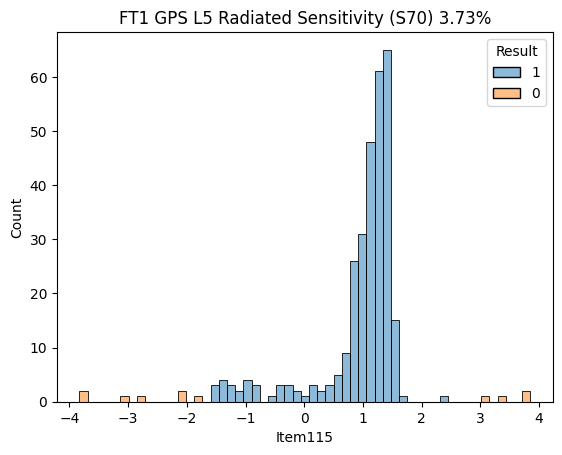

In [15]:
plt.title('FT1 GPS L5 Radiated Sensitivity (S70) 3.73%')
sns.histplot(data=tweak_df(raw,16521,115,-20), x='Item115',hue='Result', hue_order=[1,0], alpha=0.5);

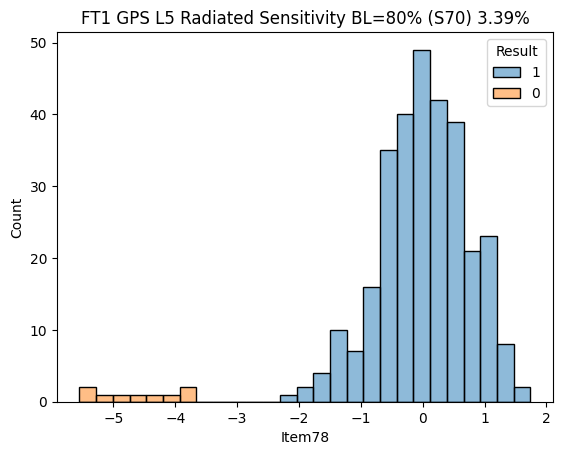

In [16]:
plt.title('FT1 GPS L5 Radiated Sensitivity BL=80% (S70) 3.39%')
sns.histplot(data=tweak_df(raw,16521,78,-20), x='Item78',hue='Result', hue_order=[1,0], alpha=0.5);

In [17]:
mn.calc_ppk(tweak_df(raw,16521,78,-20).query("Result == True")['Item78'],
    upper_specification_limit=2.5, lower_specification_limit=-2.5)

1.187832733804529

In [18]:
mn.suggest_specification_limits(
    tweak_df(raw,16521,78,-20).query("Result == True")['Item78']
)

(-2.5781948952801783, 2.6294992431062654)